# Preprocessing

## Imports

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
df = pd.read_csv('bank.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Verification of dataset


In [4]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

## Ordinal Encoding for Education and Month Columns


In [6]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder
cat = ['unknown', 'primary', 'secondary', 'tertiary'] # [0, 1, 2, 3]
encoder = OrdinalEncoder(categories = [cat])

In [8]:
df["education"] = encoder.fit_transform(df[["education"]])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1.0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,2.0,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,3.0,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,3.0,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,2.0,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,2.0,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,3.0,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,2.0,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,2.0,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
df["month"].unique()
cat = ['sep', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug'] #
encoder = OrdinalEncoder(categories = [cat])
df["month"] = encoder.fit_transform(df[["month"]])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1.0,no,1787,no,no,cellular,19,1.0,79,1,-1,0,unknown,no
1,33,services,married,2.0,no,4789,yes,yes,cellular,11,8.0,220,1,339,4,failure,no
2,35,management,single,3.0,no,1350,yes,no,cellular,16,7.0,185,1,330,1,failure,no
3,30,management,married,3.0,no,1476,yes,yes,unknown,3,9.0,199,4,-1,0,unknown,no
4,59,blue-collar,married,2.0,no,0,yes,no,unknown,5,8.0,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,2.0,no,-333,yes,no,cellular,30,10.0,329,5,-1,0,unknown,no
4517,57,self-employed,married,3.0,yes,-3313,yes,yes,unknown,9,8.0,153,1,-1,0,unknown,no
4518,57,technician,married,2.0,no,295,no,no,cellular,19,11.0,151,11,-1,0,unknown,no
4519,28,blue-collar,married,2.0,no,1137,no,no,cellular,6,5.0,129,4,211,3,other,no


## Label Encoding for binary Columns


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

binaryVariables = ["default", "housing", "loan", "y"]

for var in binaryVariables:
  df[var] = encoder.fit_transform(df[var])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1.0,0,1787,0,0,cellular,19,1.0,79,1,-1,0,unknown,0
1,33,services,married,2.0,0,4789,1,1,cellular,11,8.0,220,1,339,4,failure,0
2,35,management,single,3.0,0,1350,1,0,cellular,16,7.0,185,1,330,1,failure,0
3,30,management,married,3.0,0,1476,1,1,unknown,3,9.0,199,4,-1,0,unknown,0
4,59,blue-collar,married,2.0,0,0,1,0,unknown,5,8.0,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,2.0,0,-333,1,0,cellular,30,10.0,329,5,-1,0,unknown,0
4517,57,self-employed,married,3.0,1,-3313,1,1,unknown,9,8.0,153,1,-1,0,unknown,0
4518,57,technician,married,2.0,0,295,0,0,cellular,19,11.0,151,11,-1,0,unknown,0
4519,28,blue-collar,married,2.0,0,1137,0,0,cellular,6,5.0,129,4,211,3,other,0


## Splitting dataset

In [11]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df["y"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4383,26,admin.,single,2.0,0,609,0,0,telephone,28,4.0,112,1,-1,0,unknown
502,31,management,married,3.0,0,13,0,0,cellular,28,11.0,110,5,-1,0,unknown
4052,52,unemployed,married,1.0,0,20,1,0,telephone,28,4.0,172,1,-1,0,unknown
3634,54,retired,married,2.0,0,153,1,1,unknown,26,8.0,74,1,-1,0,unknown
3088,31,technician,single,2.0,0,2544,0,0,cellular,15,10.0,252,1,184,3,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,29,technician,single,2.0,0,534,1,0,cellular,18,8.0,382,1,-1,0,unknown
3264,36,management,single,3.0,0,613,0,0,cellular,7,11.0,86,2,-1,0,unknown
1653,53,blue-collar,married,1.0,0,306,0,0,cellular,28,10.0,388,3,181,1,success
2607,32,blue-collar,married,1.0,0,642,0,1,cellular,8,10.0,524,1,-1,0,unknown


## Frequency Encoding for job Column

In [13]:
# Warning : apply only to train set
enc_job = (X_train.groupby('job').size())/len(X_train)

In [14]:
print(enc_job["blue-collar"])

0.21045353982300885


In [15]:
for i in range(len(X_train)):
    X_train.iloc[i,1] = enc_job[X_train.iloc[i,1]]

X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4383,26,0.105088,single,2.0,0,609,0,0,telephone,28,4.0,112,1,-1,0,unknown
502,31,0.211007,married,3.0,0,13,0,0,cellular,28,11.0,110,5,-1,0,unknown
4052,52,0.029867,married,1.0,0,20,1,0,telephone,28,4.0,172,1,-1,0,unknown
3634,54,0.050332,married,2.0,0,153,1,1,unknown,26,8.0,74,1,-1,0,unknown
3088,31,0.173119,single,2.0,0,2544,0,0,cellular,15,10.0,252,1,184,3,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,29,0.173119,single,2.0,0,534,1,0,cellular,18,8.0,382,1,-1,0,unknown
3264,36,0.211007,single,3.0,0,613,0,0,cellular,7,11.0,86,2,-1,0,unknown
1653,53,0.210454,married,1.0,0,306,0,0,cellular,28,10.0,388,3,181,1,success
2607,32,0.210454,married,1.0,0,642,0,1,cellular,8,10.0,524,1,-1,0,unknown


In [16]:
for i in range(len(X_test)):
    X_test.iloc[i,1] = enc_job[X_test.iloc[i,1]]

X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,0.210454,married,1.0,0,378,1,0,unknown,16,8.0,427,3,-1,0,unknown
72,31,0.211007,single,3.0,0,6248,1,0,unknown,9,8.0,154,2,-1,0,unknown
1065,30,0.029867,married,3.0,0,0,1,0,cellular,18,2.0,756,1,-1,0,unknown
3185,42,0.105088,married,2.0,0,529,1,1,cellular,19,2.0,193,3,-1,0,unknown
130,41,0.210454,married,1.0,0,168,1,0,cellular,18,2.0,187,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,34,0.173119,single,2.0,0,2178,1,0,cellular,26,8.0,41,1,-1,0,unknown
2591,34,0.211007,married,3.0,0,2892,1,1,cellular,30,10.0,1165,7,-1,0,unknown
1224,27,0.090708,single,2.0,0,201,1,0,unknown,4,9.0,172,2,-1,0,unknown
3071,34,0.173119,single,2.0,0,347,1,0,cellular,6,5.0,154,2,197,6,failure


C:\Users\jbacb\AppData\Local\Temp\ipykernel_11288\1106838088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_test.corr())


<AxesSubplot: >

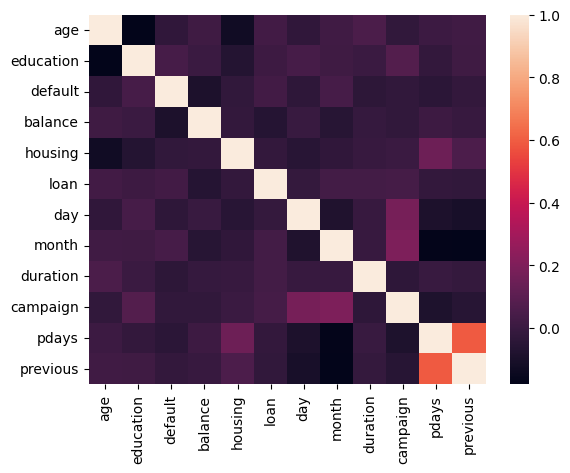

In [17]:
import seaborn as sns
sns.heatmap(X_test.corr())

## Scaling of relevant columns

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
indexesToScale = [0, 3, 5, 9, 10,11, 12, 13, 14]

In [19]:
scaler.fit(X_train.iloc[:,indexesToScale]) #education ?

StandardScaler()

In [20]:
X_train.iloc[:,indexesToScale] = scaler.transform(X_train.iloc[:,indexesToScale])
X_test.iloc[:,indexesToScale] = scaler.transform(X_test.iloc[:,indexesToScale])
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,-0.579101,0.210454,married,-1.383193,0,-0.342809,1,0,unknown,0.014415,0.103682,0.667576,0.063387,-0.404991,-0.314372,unknown
72,-0.954863,0.211007,single,1.198291,0,1.582336,1,0,unknown,-0.834147,0.103682,-0.420324,-0.261730,-0.404991,-0.314372,unknown
1065,-1.048804,0.029867,married,1.198291,0,-0.466780,1,0,cellular,0.256862,-2.030560,1.978636,-0.586848,-0.404991,-0.314372,unknown
3185,0.078483,0.105088,married,-0.092451,0,-0.293287,1,1,cellular,0.378085,-2.030560,-0.264910,0.063387,-0.404991,-0.314372,unknown
130,-0.015458,0.210454,married,-1.383193,0,-0.411682,1,0,cellular,0.256862,-2.030560,-0.288820,0.063387,-0.404991,-0.314372,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,-0.673041,0.173119,single,-0.092451,0,0.247525,1,0,cellular,1.226648,0.103682,-0.870628,-0.586848,-0.404991,-0.314372,unknown
2591,-0.673041,0.211007,married,1.198291,0,0.481691,1,1,cellular,1.711541,0.815096,3.608495,1.363858,-0.404991,-0.314372,unknown
1224,-1.330625,0.090708,single,-0.092451,0,-0.400859,1,0,unknown,-1.440263,0.459389,-0.348595,-0.261730,-0.404991,-0.314372,unknown
3071,-0.673041,0.173119,single,-0.092451,0,-0.352976,1,0,cellular,-1.197817,-0.963439,-0.420324,-0.261730,1.576479,3.133871,failure


## One Hot Inding for marital, contact and poutcome Columns

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2, 8, 15])], remainder='passthrough')

X_train = pd.DataFrame(columnTransformer.fit_transform(X_train))
X_test = pd.DataFrame(columnTransformer.fit_transform(X_test))

# Model Selection and training

In [22]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
Classifier.fit(X_train, y_train)

y_pred = Classifier.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_pred, y_train))
print(confusion_matrix(y_pred, y_train))
print('\n')


y_pred = Classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\n')

0.9029314159292036
[[3144  288]
 [  63  121]]


0.8928176795580111
[[769  73]
 [ 24  39]]




In [23]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 1000, criterion = "entropy")
Classifier.fit(X_train, y_train)

y_pred = Classifier.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_pred, y_train))
print(confusion_matrix(y_pred, y_train))
print('\n')


y_pred = Classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\n')

1.0
[[3207    0]
 [   0  409]]


0.8961325966850828
[[783  84]
 [ 10  28]]


